KNN Classification for IRIS Dataset:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


KNN Classification for Diabetes Dataset:
Accuracy: 0.6948051948051948
Confusion Matrix:
 [[79 20]
 [27 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



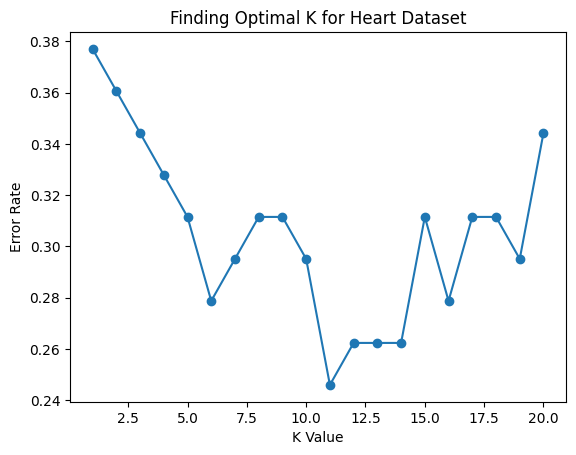

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load datasets
iris = pd.read_csv("/content/iris (2).csv")
diabetes = pd.read_csv("/content/diabetes.csv")
heart = pd.read_csv("/content/heart.csv")

# --- KNN for IRIS dataset ---
X_iris = iris.iloc[:, :-1]
y_iris = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Classification for IRIS Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- KNN for Diabetes dataset (with Feature Scaling) ---
X_diabetes = diabetes.iloc[:, :-1]
y_diabetes = diabetes.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("\nKNN Classification for Diabetes                     Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Finding Best K for Heart Dataset ---
X_heart = heart.iloc[:, :-1]
y_heart = heart.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred_k))

plt.plot(range(1, 21), error_rates, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Finding Optimal K for Heart Dataset")
plt.show()